In [16]:
"""author: sarah konrad, data+ 2023
generating word embeddings!! + heatmap generation to be added later
"""
import os
from gensim.models import Word2Vec
import glob, csv
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


def gettextsforw2v(folder):
    texts = []
    #list of lists of strings, each text broken up into individual token strings
    tokenized = []
    #list of texts as a continuous string
    textnames = []
    for file in os.listdir(folder):
        path = os.path.join(folder,file)
        name = os.path.basename(file)
        f = open(path,'r', encoding="utf-8")
        data = f.read()
        textnames.append(name)
        texts.append(data)
        f.close()
    for text in texts:
        #tokenize by white space
        words = text.strip().split(' ')
        tokenized.append(words)
    return [tokenized, texts, textnames]

corpusdata = gettextsforw2v(r'/hpc/group/datap2023ecbc/virginia_sub_no_stop')
all_texts = corpusdata[0]

word2vec = Word2Vec(all_texts, min_count=2, window=6, epochs=20)

print("Cosine similarities for 'virginia'")
print(word2vec.wv.most_similar("virginia", topn=10), "\n")
print("Cosine similarities for 'plantation'")
print(word2vec.wv.most_similar("plantation", topn=10), "\n")
print("Cosine similarities for 'convert'")
print(word2vec.wv.most_similar("convert", topn=10), "\n")
print("Cosine similarities for 'soul'")
print(word2vec.wv.most_similar("soul", topn=10), "\n")
print("Cosine similarities for 'profit'")
print(word2vec.wv.most_similar("profit", topn=10), "\n")
print("Cosine similarities for 'indian'")
print(word2vec.wv.most_similar('indian', topn=10), "\n")
print(word2vec.wv.most_similar('slave', topn=10), "\n")
print(word2vec.wv.most_similar('african', topn=10), "\n")
print(word2vec.wv.most_similar('negro', topn=10), "\n")
print("Cosine similarities for 'skin'")
print(word2vec.wv.most_similar('skin', topn=10), '\n')
print(word2vec.wv.most_similar('commodity', topn=10), '\n')
#print(word2vec.wv.most_similar('west_indies', topn=10))


Cosine similarities for 'virginia'
[('plantation', 0.7468038201332092), ('ben^', 0.7182525396347046), ('colony', 0.7054039835929871), ('sample', 0.687245786190033), ('new-england', 0.6836394667625427), ('adventurer', 0.6595269441604614), ('hither', 0.650341808795929), ('overplus', 0.647964596748352), ('planter', 0.6433967351913452), ('expectance', 0.6392657160758972)] 

Cosine similarities for 'plantation'
[('colony', 0.8041472434997559), ('already', 0.7880527377128601), ('planter', 0.7557674050331116), ('adventurer', 0.7469694018363953), ('virginia', 0.7468037009239197), ('settle', 0.728969156742096), ('hereafter', 0.7253447771072388), ('discouragement', 0.718311607837677), ('progress', 0.7130692601203918), ('adventure', 0.7128945589065552)] 

Cosine similarities for 'convert'
[('christianity', 0.8266052603721619), ('unregenerate', 0.7726001143455505), ('profess', 0.7645752429962158), ('conversion', 0.7617208361625671), ('gospel', 0.7577149271965027), ('faith', 0.7533559799194336), ('

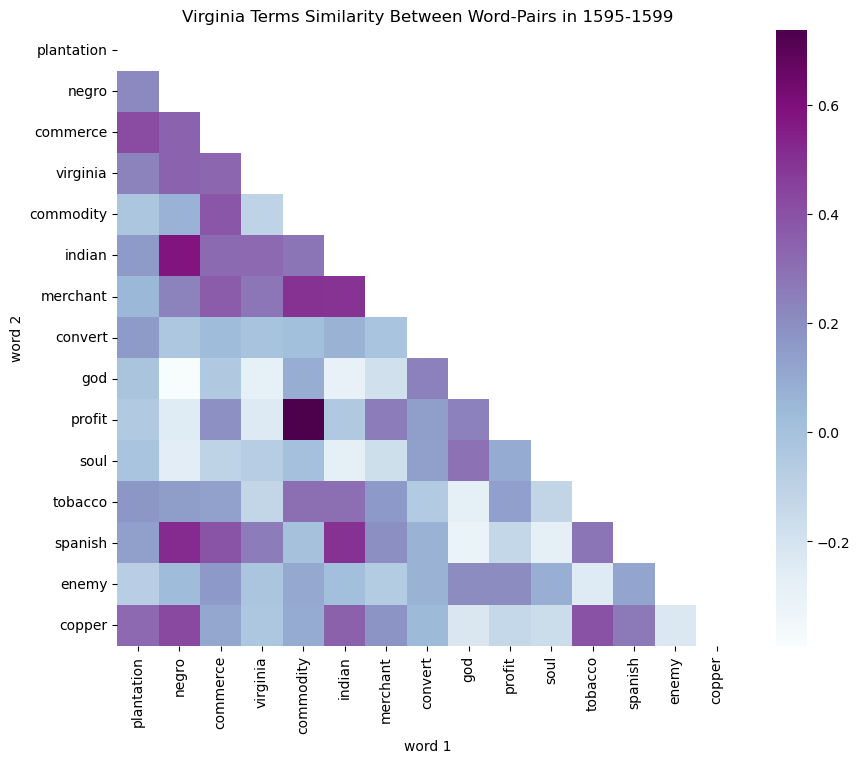

In [23]:
from gensim.models import Word2Vec
import os
from gensim.models import Word2Vec
import glob, csv
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#word2vec = Word2Vec.load("/hpc/group/datap2023ecbc/savedModels/1590-1594/1590-1594_model")
word2vec = Word2Vec.load("/hpc/group/datap2023ecbc/savedModels/1595-1599/1595-1599_model")
#word2vec = Word2Vec.load("/hpc/group/datap2023ecbc/savedModels/1600-1604/1600-1604_model")
#word2vec = Word2Vec.load("/hpc/group/datap2023ecbc/savedModels/1605-1609/1605-1609_model")
#word2vec = Word2Vec.load("/hpc/group/datap2023ecbc/savedModels/1610-1614/1610-1614_model")
#word2vec = Word2Vec.load("/hpc/group/datap2023ecbc/savedModels/1615-1619/1615-1619_model")
#word2vec = Word2Vec.load("/hpc/group/datap2023ecbc/savedModels/1620-1622/1620-1622_model")
#word2vec = Word2Vec.load("/hpc/group/datap2023ecbc/savedModels/1623-1626/1623-1626_model")
#word2vec = Word2Vec.load("/hpc/group/datap2023ecbc/savedModels/1627-1630/1627-1630_model")
#word2vec = Word2Vec.load("/hpc/group/datap2023ecbc/savedModels/1631-1635/1631-1635_model")
#word2vec = Word2Vec.load("/hpc/group/datap2023ecbc/savedModels/1636-1639/1636-1639_model")


from itertools import combinations
import numpy as np
#Heatmap
vectors = word2vec.wv

def cosine_similarity(pair):

    '''
    Word2Vec.wv.similarity(word1,word2)
    '''
    word1, word2 = pair
    if word1 and word2 in vectors:
        sim = vectors.similarity(word1,word2)
        return sim
    return 0


def generate_heatmap_matrix(lexicon):

    pairs = list(combinations(lexicon, 2))
    sim_scores = [cosine_similarity(pair) for pair in pairs if cosine_similarity(pair) != 0]

    sim_df = pd.DataFrame({'pair': pairs, 'similarity': sim_scores})

    sim_df['word1'] = sim_df['pair'].apply(lambda x: lexicon.index(x[0]))
    sim_df['word2'] = sim_df['pair'].apply(lambda x: lexicon.index(x[1]))

    sim_df['pair'] = list(zip(sim_df.word1, sim_df.word2, sim_df.similarity))

    df_hm = pd.DataFrame({'word1': range(len(lexicon)),
                          'word2': range(len(lexicon)),
                          'similarity': pd.Series(np.ones(len(lexicon)))})

    df_hm = df_hm.pivot(index='word1', columns='word2').fillna(0)

    for row, col, similarity in sim_df.pair:

        df_hm.iloc[col,row] = similarity

    return df_hm


def plot_heatmap(lexicon,title):

    df_hm = generate_heatmap_matrix(lexicon)

    mask = np.zeros_like(df_hm)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_hm,
                mask = mask,
                xticklabels = lexicon,
                yticklabels = lexicon,
                cmap="BuPu",
                )
    plt.xlabel('word 1')
    plt.ylabel('word 2')
    plt.title(title)
    plt.show()
    
spanish_lexicon = ['trade', 'gold', 'popish', 'tyranny', 'enemy', 'cruelty', 'yoke', 'force', 'spaniard', 'spanish',
                  'catholic', 'hostile', 'idolatry', 'heathen', 'commerce', 'violence', 'money', 'spain']
# lexicon = ['trade','power','evil','industry', 'savage', 'indian', 'spaniard', 'guyana', 'idleness']
# plot_heatmap(lexicon)
virginia_lexicon = ['plantation', 'negro', 'commerce', 'virginia', 'commodity', 'indian', 'merchant', 'convert',
                   'god', 'profit', "soul", 'tobacco', 'spanish', 'enemy', 'copper']

irish_lexicon = ['irish', 'ireland', 'wild', 'beggarly', 'cruel', 'rebel', 'enemy', 'papist', 'popery', 'catholic', 'war',
        'uncivil', 'idleness', 'conquer', 'ulster', 'beer', 'irishman', 'plantation', 'tyrone', 'dublin', 'armagh']
indigenous_lexicon = ['indian', 'savage', 'powhatan', 'trade', 'commerce', 'unconvert', 'copper', 'werowance',
                      'tobacco', 'japazeus', 'pocahontas', 'roanoke', 'heathen', 'inhabitant', 'smith', 
                      'emperor', 'enemy', 'nation', 'virginia']
west_indies_lexicon = ['cannibal', 'arawak', ]
portuguese_lexicon = []
african_lexicon = ['african', 'servant', 'negro', 'slave', 'guinea', 'labourer',
                  'labor', 'laborer', 'traffic', 'commerce', 'trade', 'portugal', 'virginia', 
                   'idle', 'devilish','plantation','guyana']


profit_lexicon = ['profit', 'profitable', 'commerce', 'trade', 'industry', 'labor', 'laborer', 'work', 'worker',
                 'plantation', 'negro', 'indian']
spiritual_profit_lexicon = ['convert', 'conversion', 'infidel', 'heathen', 'pagan', 'salvation', 'save', 'blessed',
    'profit', 'profitable', 'worship', 'sacrament', 'indian', 'savage', 'devilish', 'idle',
    'barbaric', 'inferior', 'labor', 'laborer','soul', 'sin', 'sinner', 'commerce'] #'unconvert',
indentured_lexicon = ['servant', 'bondman', 'bondwoman', 'covenant', 'fatherless', 'labor', 'free', 'runaway', 'maid',
                     'pensioner', 'tenant', 'orphan','apprentice','bridewell', 'contract', 'prentice', 'runagate']
#'loose_person',

plot_heatmap(virginia_lexicon,'Virginia Terms Similarity Between Word-Pairs in 1595-1599')

In [65]:
word2vec.save(r'/hpc/group/datap2023ecbc/savedModels/1636-1639/1636-1639_model')

In [26]:
import numpy as np
#per giugni's request
euc_dist = np.linalg.norm(word2vec.wv['spanish'] - word2vec.wv['virginia'])
print(euc_dist)
word2vec.wv.similarity('spanish', 'virginia')

7.4142127


0.7001323

In [3]:
word2vec.wv.most_similar(positive=['slave', 'labor'], topn=10)

[('servile', 0.6193253397941589),
 ('drudge', 0.6024256944656372),
 ('bondman', 0.5716032981872559),
 ('hire', 0.5701345801353455),
 ('slavery', 0.5533437132835388),
 ('gain', 0.5490338206291199),
 ('talon', 0.5394569635391235),
 ('toil', 0.535197913646698),
 ('painful', 0.5330458879470825),
 ('thraldom', 0.5297439098358154)]

In [53]:
#word2vec.wv.closer_than('trade', 'commerce')

In [20]:
word2vec.wv.most_similar(positive=['king', 'indian'], topn=10)

[('cacique', 0.8031970858573914),
 ('powhatan', 0.7944454550743103),
 ('vcita', 0.7818726301193237),
 ('mococo', 0.7706626057624817),
 ('whereupon', 0.7466806769371033),
 ('werowocomoco', 0.7393056154251099),
 ('werowance', 0.7386603355407715),
 ('messenger', 0.7379097938537598),
 ('mangu-can', 0.7260579466819763),
 ('guide', 0.724593460559845)]

In [21]:
word2vec.wv.most_similar(positive=['daughter', 'powhatan'], topn=10)

[('pocahontas', 0.8534677028656006),
 ('cacique', 0.7934460043907166),
 ('bituani', 0.7808674573898315),
 ('kinsman', 0.7763247489929199),
 ('messenger', 0.7761536836624146),
 ('redeliver', 0.774207592010498),
 ('rowen', 0.772729754447937),
 ('governors', 0.7720314264297485),
 ('maid', 0.7667589783668518),
 ('werowance', 0.7588486075401306)]